In [2]:
import numpy as np
import math
from math import sqrt
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute, Aer, BasicAer
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit import transpile

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8020\3115452656.py:5: DeprecationWarning: BasicAer is deprecated since Qiskit 0.46 and will be removed in Qiskit 1.0. The BasicAer (qiskit.providers.basicaer) module has been superseded by  qiskit.providers.basic_provider, and all its classes have been renamed to follow a new naming convention. More information and migration guidelines can be found in the 0.46 API docs for BasicAer.
  from qiskit import execute, Aer, BasicAer


# 1. Encoding Data
#### Ada tiga cara :
- 1. Pengkodean Basis:      x=(b1,b2,…,bN) menjadi |x⟩=|b1,b2,…bN⟩
- 2. Pengkodean Amplitudo   |x⟩=∑xi |i⟩ 
- 3. Pengkodean Sudut       |x⟩=⊗i R(xi)|0^n ⟩

#### A. Pengkodean Basis

C:\Users\ASUS\anaconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


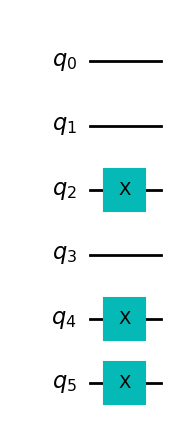

In [3]:
# x = 52 (Desimal) = 1 1 0 1 0 0 (biner)
x = [1,1,0,1,0,0]
panjang_x = len(x)
qc = QuantumCircuit(6)        # Buat sirkuit kuantum dengan 6 qubit: q3, q2, q1, q0

for i in range(panjang_x):
    if x[i]==1:
        qc.x(panjang_x-1-i)
qc.draw('mpl')

In [4]:
psi = Statevector(qc)
psi.draw('latex')

<IPython.core.display.Latex object>

### B. Pengkodean Amplitudo

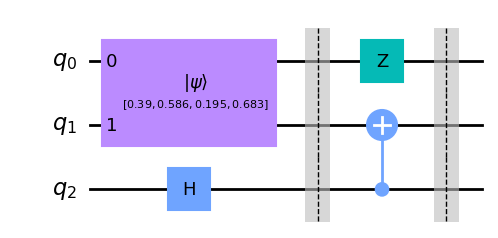

In [5]:
### Data diNormalisasi
x = [4,6,2,7]
norm = np.linalg.norm(x)
x_normal = x / norm

################################
qc = QuantumCircuit(3)

qc.initialize(x_normal, [0,1])
qc.h([2])             # terapkan gerbang Hadamard pada q0 dan q2
qc.barrier()            # pembatas
qc.cx(2,1)              # Gerbang Kontrol NOT, q2 sebagai kontrol, q1 sebagai target
qc.z(0)                 # terapkan gerbang Z pada q0
qc.barrier()            # pembatas
qc.draw('mpl')

In [6]:
psi = Statevector(qc)
psi.draw('latex')

<IPython.core.display.Latex object>

### C. Pengkodean Sudut

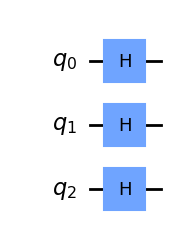

In [7]:
qc = QuantumCircuit(3)
qc.h([0,1,2])
qc.draw('mpl')

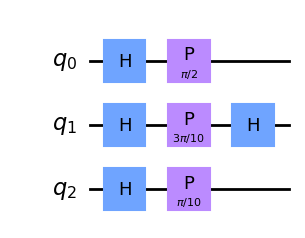

In [8]:
# ubah data menjadi sudut 0 s/d 2*pi
x=[25, 15, 5]  # Data dari fitur

qc.p(2*np.pi*x[0]/100,0)  # sudut x0 bekerja pada qubit ke-0
qc.p(2*np.pi*x[1]/100,1)  # sudut x1 bekerja pada qubit ke-1
qc.p(2*np.pi*x[2]/100,2)  # sudut x2 bekerja pada qubit ke-2

qc.h(1)
qc.draw('mpl')

In [9]:
psi = Statevector(qc)
psi.draw('latex')

<IPython.core.display.Latex object>

# 2. Parameterized Circuit
- Qiskit mendukung sirkuit berparameter. Sirkuit ini memiliki parameter yang tidak ditentukan, dan nilainya tidak perlu ditentukan hingga sesaat sebelum rangkaian dijalankan. Ini memungkinkan Anda memindahkan konstruksi sirkuit dan pengoptimalan dari loop program utama. Sel berikut membuat dan menampilkan sirkuit berparameter

##### Contoh 1: Rangkaian Berparameter

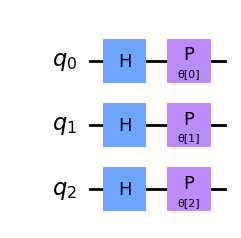

In [10]:
from qiskit.circuit import QuantumCircuit,ParameterVector

theta = ParameterVector('θ', 3)

qc = QuantumCircuit(3)
qc.h([0,1,2])
qc.p(theta[0],0)
qc.p(theta[1],1)
qc.p(theta[2],2)

qc.draw('mpl')

##### Memberi nilai pada parameter

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8020\1278063098.py:2: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use assign_parameters() instead
  b_qc = qc.bind_parameters({theta: [math.pi/8, math.pi/4, math.pi/2]})


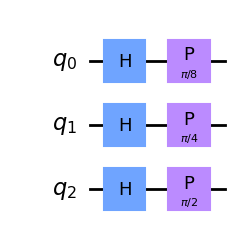

In [11]:
import math
b_qc = qc.bind_parameters({theta: [math.pi/8, math.pi/4, math.pi/2]})
b_qc.draw('mpl')

##### Melihat State

In [12]:
psi = Statevector(b_qc)
psi.draw('latex')

<IPython.core.display.Latex object>

#### Contoh 2: 

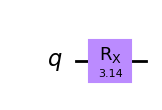

In [13]:
from qiskit.circuit import QuantumCircuit, Parameter
 
# create the parameter
phi = Parameter('phi')
qc = QuantumCircuit(1)
 
# parameterize the rotation
qc.rx(phi, 0)

# bind the parameters after circuit to create a bound circuit
bc = qc.assign_parameters({phi: 3.14})
bc.draw('mpl')

In [14]:
psi = Statevector(b_qc)
psi.draw('latex')

<IPython.core.display.Latex object>

## Rangkaian Khusus

##### Contoh 1: ZZFeatureMap

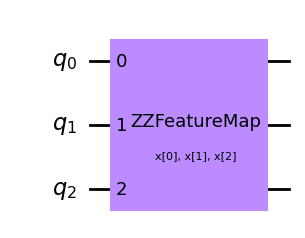

In [15]:
from qiskit.circuit.library import ZZFeatureMap
 
x = [0.2, 0.4, 0.8]
feature_map = ZZFeatureMap(feature_dimension=len(x))
feature_map.draw('mpl')

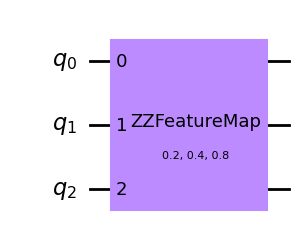

In [16]:
encoded = feature_map.assign_parameters(x)
encoded.draw('mpl')

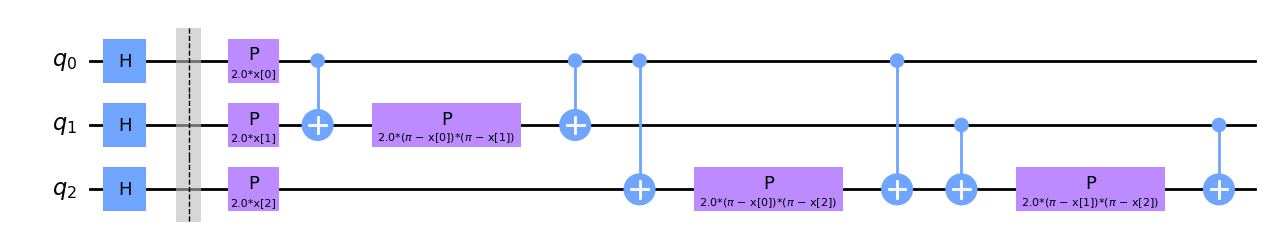

In [17]:
from qiskit.circuit.library import ZZFeatureMap
qc_zz = ZZFeatureMap(3, reps=1, insert_barriers=True)
qc_zz.decompose().draw('mpl')

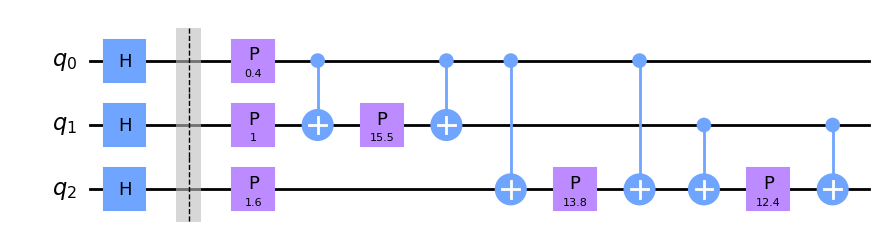

In [18]:
x=[0.2, 0.5, 0.8]
encoded = qc_zz.assign_parameters(x)
encoded.decompose().draw('mpl')

In [19]:
psi = Statevector(encoded)
psi.draw('latex')

<IPython.core.display.Latex object>

### Contoh 2: TwoLocal

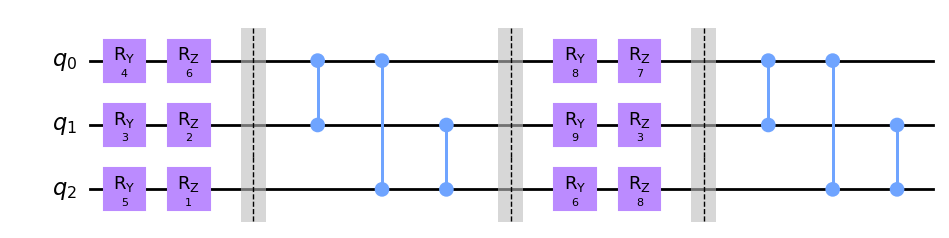

In [23]:
from qiskit.circuit.library import TwoLocal
qc_twolocal = TwoLocal(num_qubits=3, reps=2, rotation_blocks=['ry','rz'],
                entanglement_blocks='cz', skip_final_rotation_layer=True,
                insert_barriers=True)

x=[4,3,5,6,2,1,8,9,6,7,3,8]
encode = qc_twolocal.assign_parameters(x)
encode.decompose().draw(output="mpl", style="clifford", fold=20)